# "Exponantial" fractals?

Here's a curious variant of the Newton-Raphson method. Suppose we're interested in finding the zeros of the real-valued function $f(x)$. Consider the function $g(x) = e^{\frac{1}{2}x^2}f(x)$. Observe that $g$ is differentiable precisely where $f$ is and that $f(x_0)=0$ if and only if $g(x_0)=0$. Moreover, if we try applying Neton-Raphson to $g$ instead of $f$ we find that
$$
x-\frac{g(x)}{g'(x)}=x-\frac{e^{\frac{1}{2}x^2}f(x)}{e^{\frac{1}{2}x^2}f'(x)+xe^{\frac{1}{2}x^2}f(x)}=\frac{f(x)}{f'(x)-xf(x)}
$$
which is not substantially more computationally difficult to calculate than the original Newton-Raphson approach, but does seem to have a different convergence behaviour. It is therefore interesting to compare the sorts of fractals this gives us.

## The usual imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

In [8]:
def new_exp(z0, f, fprime, MAX_IT=1000):
    """The 'Exponential' method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/(fprime(z) + z*f(z))
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

## The polynomial $z^4-1$

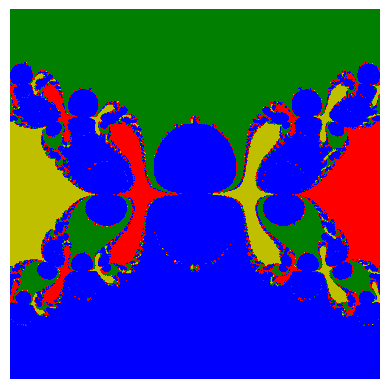

In [9]:
def plot_exp_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):

    roots = []
    m = np.zeros((n, n))
    
    def get_root_index(roots, r):

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1
        
    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = new_exp(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_exp_fractal(f, fprime, n=500)